In [501]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt

# K_Mean

In [502]:
class K_Mean():
    def __init__(self, K, points, centroids):
        self.K = K
        self.N = len(points)
        self.points = np.zeros((self.N,2))
        self.centroids = np.zeros((self.K,2))
        
        for i in range(self.N):
            self.points[i, :] = points[i]
        for i in range(self.K):
            self.centroids[i, :] = centroids[i]
            
        self.centroid_for_all = np.mean(self.points, axis = 0)
        
        self.clusters = [[] for _ in range(self.K)] 
        self.count = 0
        
    def cal_distance(self, point1, point2):
        return math.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)
          
    def assign(self) :
        self.clusters = [[] for _ in range(self.K)] 
        for point in self.points:
            distance = np.zeros(self.K)
            for i in range(self.K):
                distance[i] = self.cal_distance(self.centroids[i], point)
            self.clusters[np.argmin(distance)].append(point)
        for i in range(self.K) :
            self.clusters[i] = np.array(self.clusters[i])
            
    def update(self) : 
        for i in range(self.K) : 
            x, y  = np.mean(self.clusters[i], axis = 0)
            self.centroids[i] = (x, y)
            
    def show(self) : 
        for i in range(self.K) : 
            plt.scatter(self.clusters[i][:, 0], self.clusters[i][:,1], )
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker = "*", s = 200, alpha = 0.3)
        plt.scatter(self.centroid_for_all[0], self.centroid_for_all[1], s = 200, alpha = 0.3)
        
    def fraction_var(self):
        all_data_variance =  np.sum(np.square(np.linalg.norm(self.points-self.centroid_for_all, ord=2, axis = 1)))/(self.N-1)
        between_cluster_variance = np.square(np.linalg.norm(self.centroids-self.centroid_for_all, ord = 2, axis = 1))
        for i in range(self.K):
            between_cluster_variance[i] *= len(self.clusters[i])
        between_cluster_variance =  np.sum(between_cluster_variance)/(self.N-1)
        return between_cluster_variance/all_data_variance
        
    def learn(self, iterative) :
        for _ in range(iterative):
            self.assign()
            self.update()
            
        
        

# T1

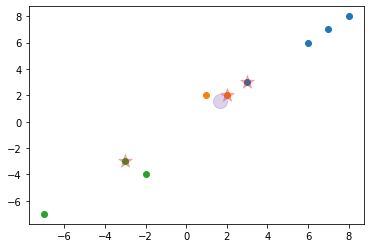

In [503]:
points = [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7,-7)]
centoids = [(3, 3), (2, 2), (-3, -3)]
k_mean = K_Mean(3, points, centoids)

k_mean.assign() 
k_mean.show()
plt.show()

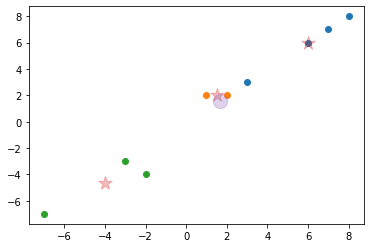

In [504]:
k_mean.update()
k_mean.show()
plt.show()

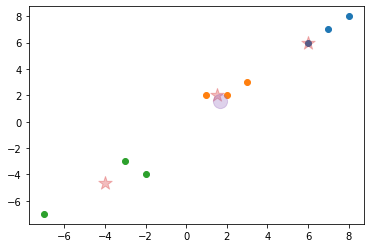

In [505]:
k_mean.assign() 
k_mean.show()
plt.show()

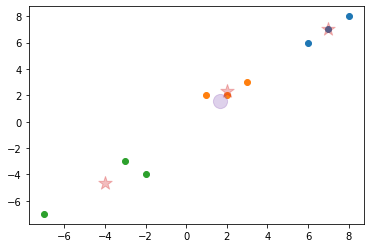

In [506]:
k_mean.update()
k_mean.show()
plt.show()

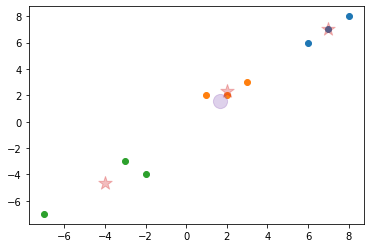

In [507]:
k_mean.assign() 
k_mean.show()
plt.show()

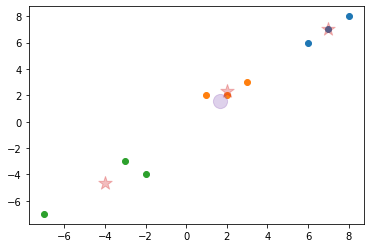

In [508]:
k_mean.update()
k_mean.show()
plt.show()

In [509]:
fraction_var1 = k_mean.fraction_var()
fraction_var1

0.9298618490967056

# T2

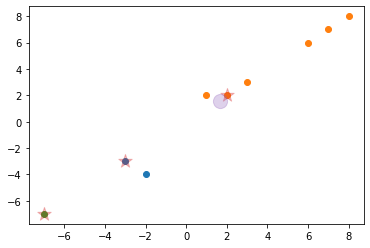

In [510]:
points = [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7,-7)]
centoids = [(-3, -3), (2, 2), (-7, -7)]
k_mean = K_Mean(3, points, centoids)

k_mean.assign() 
k_mean.show()
plt.show()

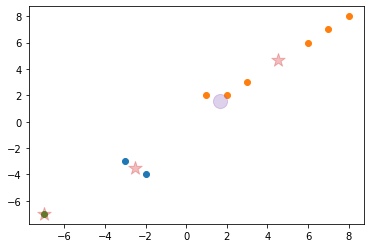

In [511]:
k_mean.update()
k_mean.show()
plt.show()

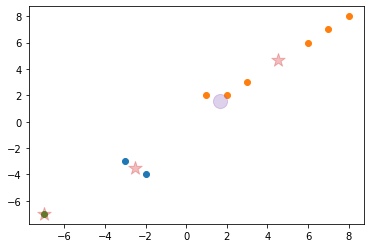

In [512]:
k_mean.assign() 
k_mean.show()
plt.show()

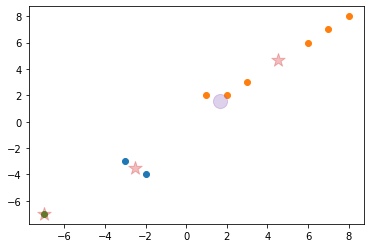

In [513]:
k_mean.update()
k_mean.show()
plt.show()

In [514]:
fraction_var2 = k_mean.fraction_var()
fraction_var2

0.813894792773645

# T3

In [515]:
fraction_var1, fraction_var2

(0.9298618490967056, 0.813894792773645)

# Titanic

In [516]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [517]:
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [518]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# T4

In [519]:
train['Age'].median()

28.0

In [520]:
train["Age"] = train["Age"].fillna(train["Age"].mode()[0])
train["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

# T5

In [521]:
mode = train['Embarked'].mode()
mode[0]

'S'

In [522]:
train["Embarked"] = train["Embarked"].fillna(mode[0])
train["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [523]:
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


In [524]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [525]:
X_train = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
X_train

array([[ 3.,  0., 22.,  0.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       ...,
       [ 3.,  1., 24.,  0.],
       [ 1.,  0., 26.,  1.],
       [ 3.,  0., 32.,  2.]])

In [526]:
y_train = np.array(train[["Survived"]].values, dtype = float)
y_train.shape

(891, 1)

# T6

In [527]:
class Preprocessor :
  def __init_(self):
    self.age = 0
    self.embarked = ""

  def fit_transform(self, X, feature_name):
    self.age = X["Age"].mode()[0]
    self.embarked = X["Embarked"].mode()[0]

    X = self.to_num(X)

    for feature in feature_name:
      if "_" in feature:
        temp = feature.split("_")
        X[feature] = X[temp[0]]*X[temp[1]]
    return np.array(X[feature_name].values, dtype = float)

  def to_num(self, X):
    X["Age"] = X["Age"].fillna(self.age)
    X["Embarked"] = X["Embarked"].fillna(self.embarked)
    X.loc[X["Embarked"] == "S", "Embarked"] = 0
    X.loc[X["Embarked"] == "C", "Embarked"] = 1
    X.loc[X["Embarked"] == "Q", "Embarked"] = 2
    X.loc[X["Sex"] == "male", "Sex"] = 0
    X.loc[X["Sex"] == "female", "Sex"] = 1
    return X

  def transform(self, X, feature_name):
    X = self.to_num(X)
    for feature in feature_name:
      if "_" in feature:
        temp = feature.split("_")
        X[feature] = X[temp[0]]*X[temp[1]]
    return np.array(X[feature_name].values, dtype = float)


In [528]:
class Logistic_Regression:
  def __init__(self, X_train, y_train, lr = 0.5):
    
    self.X_train = np.ones((X_train.shape[1]+1, X_train.shape[0]))
    self.X_train[1:, :] = X_train.T

    self.X_train_min = self.X_train.min(axis = 1)
    self.X_train_min = np.reshape(self.X_train_min, (self.X_train_min.shape[0], 1))
    self.X_train_max = self.X_train.max(axis = 1)
    self.X_train_max = np.reshape(self.X_train_max, (self.X_train_max.shape[0], 1))

    self.X_train = self.scaler(self.X_train)

    self.y_train = y_train.T
    self.weight = np.random.rand(self.X_train.shape[0], 1)
    self.lr = lr

  def scaler(self, X) :
    return np.nan_to_num((X-self.X_train_min)/(self.X_train_max - self.X_train_min), nan = 1)

  def train(self, iteration = 1):
    losses = list()
    for i in range(iteration) :
      prediction = 1/(1+np.exp(-np.matmul(self.weight.T, self.X_train)))
      loss = self.y_train - prediction
      self.weight += self.lr*np.matmul(loss, self.X_train.T).T
      losses.append(np.sum(loss**2)/self.X_train.shape[1])
    return losses

  def predict(self, X_test):
    prediction = self.predict_proba(X_test)
    return (prediction > 0.5).astype('int')

  def predict_proba(self, X_test) :
    X = np.ones((X_test.shape[1]+1, X_test.shape[0]))
    X[1:, :] = X_test.T
    prediction = 1/(1+np.exp(-np.matmul(self.weight.T, self.scaler(X))))
    return prediction

  def accuracy(self) :
    prediction = 1/(1+np.exp(-np.matmul(self.weight.T, self.X_train)))
    prediction = (prediction > 0.5).astype('int')
    return (prediction == self.y_train).sum()/(self.y_train.shape[1])

[0.33539742236752135, 0.2634290558841657, 0.22579891376294253, 0.2080750633126556, 0.198746116886731, 0.19277182845574856, 0.18825483595174625, 0.18448912183509525, 0.1811998308162104, 0.17826879636578802, 0.17563577365935346, 0.17326265145255085, 0.17112048441206185, 0.16918483836471815, 0.1674341342607893, 0.1658490392992984, 0.1644121994128184, 0.16310806873078523, 0.16192275944432322, 0.16084389365390786, 0.1598604568028709, 0.1589626563352246, 0.15814178890253816, 0.1573901181643466, 0.15670076404266628, 0.15606760344573245, 0.15548518194985209, 0.1549486356403159, 0.15445362218428468, 0.15399626018060297, 0.1535730758621682, 0.1531809562886982, 0.15281710824447786, 0.15247902213663903, 0.15216444026878792, 0.1518713289391415, 0.15159785388023947, 0.1513423586182559, 0.15110334538400924, 0.15087945825535512, 0.15066946825228428, 0.1504722601423399, 0.1502868207455178, 0.1501122285551929, 0.14994764451534795, 0.14979230381494435, 0.1496455085780899, 0.14950662134408987, 0.149375059

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


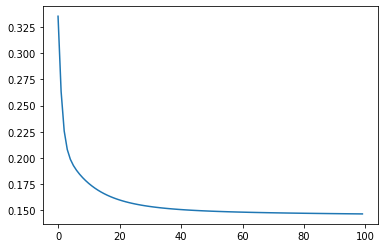

In [529]:
preprocessor = Preprocessor()
X_train = preprocessor.fit_transform(train, ["Pclass","Sex","Age","Embarked"])
model1 = Logistic_Regression(X_train, y_train, lr = 0.001)
losses = model1.train(100)
print(losses)
plt.plot(losses)

In [530]:
X_Test = preprocessor.transform(test, ["Pclass","Sex","Age","Embarked"])
X_Test

array([[ 3. ,  0. , 34.5,  2. ],
       [ 3. ,  1. , 47. ,  0. ],
       [ 2. ,  0. , 62. ,  2. ],
       ...,
       [ 3. ,  0. , 38.5,  0. ],
       [ 3. ,  0. , 24. ,  0. ],
       [ 3. ,  0. , 24. ,  1. ]])

In [531]:
y_test = model1.predict(X_Test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [532]:
export = test[['PassengerId']]
export['Survived'] = y_test.T.astype('int')
export.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [533]:
export.to_csv('export.csv', index=False)

#T8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


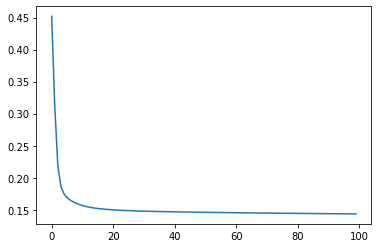

In [549]:
feature_name = ["Pclass","Sex","Age","Embarked", 
                "Age_Pclass", "Age_Sex", "Age_Age", "Age_Embarked",
                "Pclass_Sex", "Pclass_Pclass", "Pclass_Embarked",
                "Sex_Sex", "Sex_Embarked",
                "Embarked_Embarked"]
X_train = preprocessor.transform(train, feature_name)
model2 = Logistic_Regression(X_train, y_train, lr = 0.001)
losses = model2.train(100)
plt.plot(losses)

In [550]:
feature_name = ["Pclass","Sex","Age","Embarked", 
                "Age_Pclass", "Age_Sex", "Age_Age", "Age_Embarked",
                "Pclass_Sex", "Pclass_Pclass", "Pclass_Embarked",
                "Sex_Sex", "Sex_Embarked",
                "Embarked_Embarked"]
X_Test = preprocessor.transform(test, feature_name)
y_test = model2.predict(X_Test)
export = test[['PassengerId']]
export['Survived'] = y_test.T.astype('int')
export.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [551]:
export.to_csv('export2.csv', index=False)

In [552]:
model1.accuracy(), model2.accuracy()

(0.7867564534231201, 0.7856341189674523)

# T9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


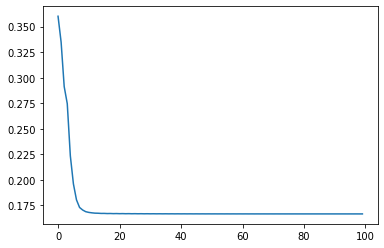

In [553]:
feature_name = ["Sex","Age"]
X_train = preprocessor.transform(train, feature_name)
model3 = Logistic_Regression(X_train, y_train, lr = 0.01)
losses = model3.train(100)
plt.plot(losses)

In [554]:
model3.accuracy()

0.7867564534231201

In [555]:
feature_name = ["Sex","Age"]
X_test = preprocessor.transform(test, feature_name)
y_test = model3.predict(X_test)
export = test[['PassengerId']]
export['Survived'] = y_test.T.astype('int')
export.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [556]:
export.to_csv('export3.csv', index=False)

#OT2

In [542]:
X_train = model1.X_train
X_train = X_train.T
X_train.shape, y_train.shape

((891, 5), (891, 1))

In [543]:
X_train

array([[1.        , 1.        , 0.        , 0.27117366, 0.        ],
       [1.        , 0.        , 1.        , 0.4722292 , 0.5       ],
       [1.        , 1.        , 1.        , 0.32143755, 0.        ],
       ...,
       [1.        , 1.        , 1.        , 0.2963056 , 0.        ],
       [1.        , 0.        , 0.        , 0.32143755, 0.5       ],
       [1.        , 1.        , 0.        , 0.39683338, 1.        ]])

In [544]:
weight = np.linalg.inv(np.matmul(X_train.T, X_train))
weight = np.matmul(weight, X_train.T)
weight = np.matmul(weight, y_train)
weight.shape

(5, 1)

In [545]:
weight, model1.weight

(array([[ 0.57483068],
        [-0.37657417],
        [ 0.49299994],
        [-0.3806769 ],
        [ 0.09027122]]), array([[-0.46754159],
        [-1.67713419],
        [ 2.50622921],
        [-0.16848171],
        [ 0.53223981]]))

#OT3

In [546]:
X_train2 = X_train[:, 1:]
X_train2.shape

(891, 4)

loss 1 with logistic regression

In [547]:
predict_proba = model1.predict_proba(X_train2)
loss1 = y_train - predict_proba.T
loss1 = (np.sum(loss**2))/X_train.shape[0]
loss1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


309.6673883542379

loss2 with linear regression by matrix inversion.

In [548]:
predict = np.matmul(X_train, weight)
loss2 = y_train - predict
loss2 = (np.sum(loss**2))/X_train.shape[0]
loss2

309.6673883542379